import library

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
df = pd.read_csv(r".\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Data cleaning

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

3

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.replace({'species':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}},inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_18100\853540131.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'species':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}},inplace=True)


<Axes: >

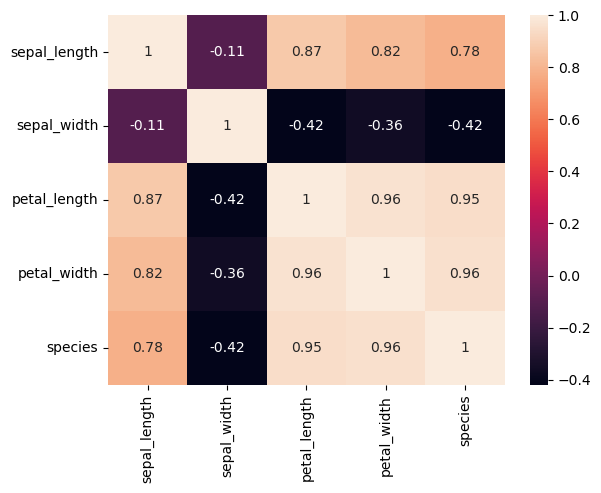

In [11]:
sns.heatmap(df.corr(),annot=True)

In [23]:
X= df.drop("species",axis=1)
y=df['species']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [27]:
log_reg = LogisticRegression(max_iter=500)

In [29]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [31]:
log_reg.score(X_train,y_train)

0.9901960784313726

In [33]:
y_pred = log_reg.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 14]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

